# Task 2

Surya Dutt Sharma

Image to Pencil Sketch with Python

Image description:

We need to read the image in RBG format and then convert it to a grayscale image. This will turn an image into a classic black and white photo. Then the next thing to do is invert the grayscale image also called negative image, this will be our inverted grayscale image. Inversion can be used to enhance details. Then we can finally create the pencil sketch by mixing the grayscale image with the inverted blurry image. This can be done by dividing the grayscale image by the inverted blurry image. Since images are just arrays, we can easily do this programmatically using the divide function from the cv2 library in Python.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2 
cv2.__version__
%matplotlib inline

In [12]:
# Reading the Image and converting it into an matrix.
image = cv2.imread("image1.jpg",0)
image

array([[167, 167, 168, ..., 151, 151, 151],
       [167, 167, 167, ..., 151, 151, 151],
       [166, 167, 167, ..., 151, 151, 151],
       ...,
       [ 61,  86,  91, ..., 141, 149, 150],
       [ 71,  96, 110, ..., 148, 147, 149],
       [ 74, 100, 116, ..., 147, 147, 150]], dtype=uint8)

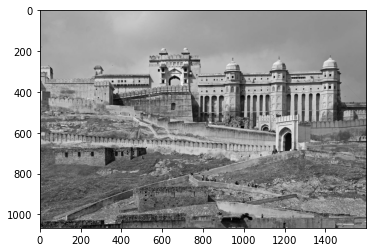

In [13]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [14]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grey

array([[167, 167, 168, ..., 151, 151, 151],
       [167, 167, 167, ..., 151, 151, 151],
       [166, 167, 167, ..., 151, 151, 151],
       ...,
       [ 61,  86,  91, ..., 141, 149, 150],
       [ 71,  96, 110, ..., 148, 147, 149],
       [ 74, 100, 116, ..., 147, 147, 150]], dtype=uint8)

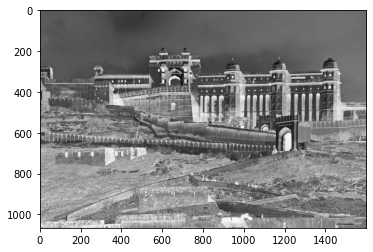

In [15]:
negative = 255 - img # Subtract the inverted image from 255 to get the grey image
plt.imshow(negative)

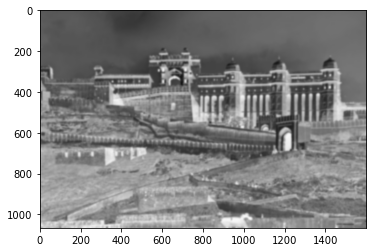

In [16]:
blurred = cv2.GaussianBlur(negative, (21,21),0)
plt.imshow(blurred)

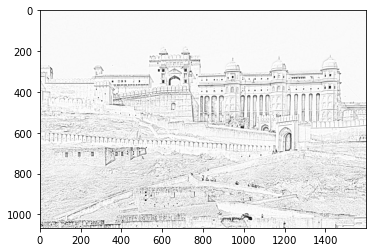

In [17]:
def dodge_img(x,y):
    return cv2.divide(x,255-y,scale=250)
dodged_img=dodge_img(img,blurred)
plt.imshow(dodged_img)

In [19]:
def burn_img(image, mask):
    return 255 - (cv2.divide(255-image, 255-mask, scale=200))
final_image=burn_img(dodged_img,blurred)

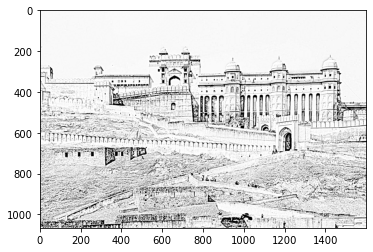

In [20]:
plt.imshow(final_image)